In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('visa_stocks.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-03-19,14.875000,17.250000,13.7500,14.1250,12.579995,708486000
1,2008-03-20,14.600000,16.250000,14.3750,16.0875,14.327834,198985200
2,2008-03-24,16.809999,16.924999,14.7500,14.9325,13.299167,149566400
3,2008-03-25,15.145000,16.062500,14.9550,15.8125,14.082910,87092000
4,2008-03-26,15.682500,16.120001,15.3925,15.9900,14.240999,43111600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4177 non-null   object 
 1   Open       4177 non-null   float64
 2   High       4177 non-null   float64
 3   Low        4177 non-null   float64
 4   Close      4177 non-null   float64
 5   Adj Close  4177 non-null   float64
 6   Volume     4177 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 228.6+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4177 non-null   datetime64[ns]
 1   Open       4177 non-null   float64       
 2   High       4177 non-null   float64       
 3   Low        4177 non-null   float64       
 4   Close      4177 non-null   float64       
 5   Adj Close  4177 non-null   float64       
 6   Volume     4177 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 228.6 KB


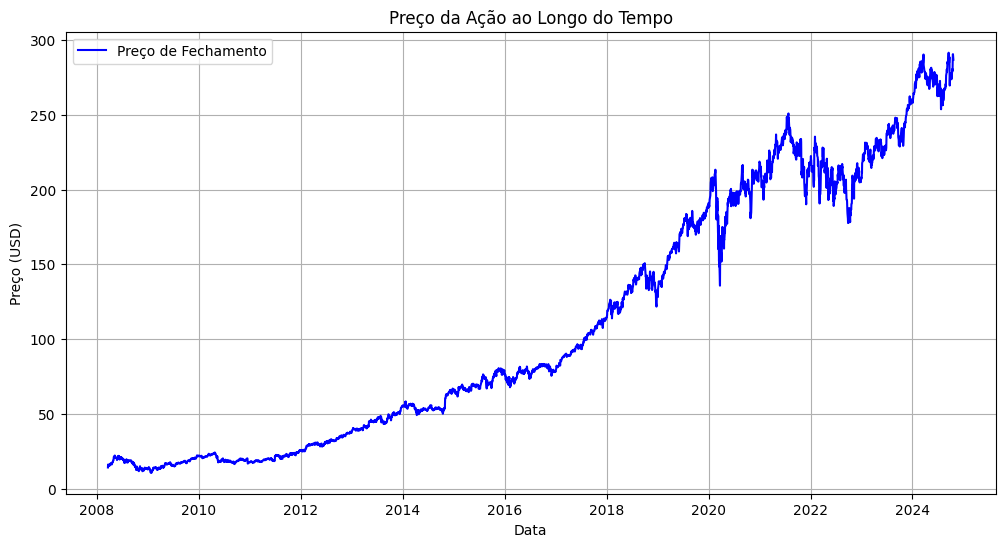

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Preço de Fechamento', color='blue')
plt.title(f'Preço da Ação ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid()
plt.show()

### Moving Avg

In [8]:
df['Moving_Avg_5'] = df['Close'].rolling(window=5).mean()

In [9]:
df['Moving_Avg_10'] = df['Close'].rolling(window=10).mean()

### Exp Moving Avg

In [10]:
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Avg_5,Moving_Avg_10,EMA_5,EMA_10
0,2008-03-19,14.875000,17.250000,13.7500,14.1250,12.579995,708486000,NaN,NaN,14.125000,14.125000
1,2008-03-20,14.600000,16.250000,14.3750,16.0875,14.327834,198985200,NaN,NaN,14.779167,14.481818
2,2008-03-24,16.809999,16.924999,14.7500,14.9325,13.299167,149566400,NaN,NaN,14.830278,14.563760
3,2008-03-25,15.145000,16.062500,14.9550,15.8125,14.082910,87092000,NaN,NaN,15.157685,14.790804
4,2008-03-26,15.682500,16.120001,15.3925,15.9900,14.240999,43111600,15.3895,NaN,15.435123,15.008839


### RSI

In [12]:
delta = df['Close'].diff()

gain = (delta.where(delta > 0, 0)).rolling(window= 14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window= 14).mean()
rs = gain/loss

df['RSI'] = 100 - (100 / (1 + rs))

### Bollinger Bands

In [14]:
df['Middle_Band'] = df['Close'].rolling(window=20).mean()
df['Upper_Band'] = df['Middle_Band'] + (df['Close'].rolling(window=20).std() * 2)
df['Lower_Band'] = df['Middle_Band'] - (df['Close'].rolling(window=20).std() * 2)

### Avg Volume

In [15]:
df['Avg_Volume'] = df['Volume'].rolling(window=20).mean()

### Removing Nan Values

In [16]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace= True)

In [17]:
df.columns.to_list()

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Moving_Avg_5',
 'Moving_Avg_10',
 'EMA_5',
 'EMA_10',
 'RSI',
 'Middle_Band',
 'Upper_Band',
 'Lower_Band',
 'Avg_Volume']

In [18]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

In [20]:
features = df[['Open',
               'Low',
               'Close',
               'Adj_Close',
               'Volume',
               'Moving_Avg_5',
               'Moving_Avg_10',
               'EMA_5',
               'EMA_10',
               'RSI',
               'Middle_Band',
               'Upper_Band',
               'Lower_Band',
               'Avg_Volume']]

target = df['High']

### Importing Model related features

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

### Model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size= 0.2,
                                                    random_state= 10)

In [23]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)


In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 0.4325846946239475
MSE: 0.6694976077544924
RMSE: 0.8182283347296722
R²: 0.9999112944125944


In [32]:
df['High'].mean()

np.float64(111.42052492538056)

In [33]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Exibir resultados
print(f'Treinamento - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R²: {r2_train}')
print(f'Teste - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R²: {r2_test}')

Treinamento - MAE: 0.1497347289427747, MSE: 0.07307319592380221, RMSE: 0.27032054291859176, R²: 0.9999898685414365
Teste - MAE: 0.4325846946239475, MSE: 0.6694976077544924, RMSE: 0.8182283347296722, R²: 0.9999112944125944
